In [7]:
grammar = """
sentence = adj noun verb adv noun2
adj = adj_single adj_single 的 | null
adj_single = 漂亮  | 蓝色 | 好看
adv = 安静地 | 静静
noun = 猫 | 女人 | 男人
verb = adv 看着 | adv 坐着 
noun2 = 桌子 | 皮球 
"""

In [8]:
def build_grammar(grammar_str, split='='):
    grammar_pattern = {}
    for line in grammar_str.split('\n'):
        if not line: continue
        stmt, expr = line.split(split)
        grammar_pattern[stmt.strip()] = [e.split() for e in expr.split('|')]
    return grammar_pattern

In [9]:
import random

In [10]:
def generate(grammar_pattern, target):
    if target not in grammar_pattern: return target
    
    expr = random.choice(grammar_pattern[target])
    
    tokens = [generate(grammar_pattern, e) for e in expr]
    
    return ''.join([t for t in tokens if t != 'null'])

In [11]:
grammar_pattern = build_grammar(grammar)

In [12]:
generate(grammar_pattern, 'sentence')

'漂亮蓝色的女人安静地坐着静静皮球'

## A simple solution

In [13]:
def adj(): return random.choice('漂亮 | 蓝色 | 好看'.split('|'))

In [14]:
def noun(): return  random.choice('猫 | 女人 | 男人'.split('|'))

In [15]:
def verb(): return random.choice('看着 | 坐着 '.split('|'))

In [16]:
def noun2(): return random.choice('桌子 | 皮球'.split('|'))

In [17]:
def sentence(): return ''.join([adj(), noun(), verb(), noun2()])

In [18]:
sentence()

'漂亮  女人 看着 桌子 '

## Search Based Intelligence

## BSF 广度搜索 DFS 深度优先搜索

### BFS Breadth First Search 
### DFS Deep First Search

In [19]:
graph = {
    'A' :'B B B C', 
    'B' : 'A C', 
    'C' : 'A B D E',
    'D' : 'C',
    'E' : 'C F',
    'F' : 'E'
}

In [20]:
for k in graph:
    graph[k] = set(graph[k].split())

In [21]:
'元素' in set('1 2 3 4 5 6 7 8 9 10 100000 元素'.split())

True

In [22]:
for element in set('1 2 3 4 5 6 7 8 9 10 100000 元素'.split()):
    print(element)

3
2
10
6
5
4
8
1
7
元素
100000
9


In [23]:
graph

{'A': {'B', 'C'},
 'B': {'A', 'C'},
 'C': {'A', 'B', 'D', 'E'},
 'D': {'C'},
 'E': {'C', 'F'},
 'F': {'E'}}

In [24]:
L = [0, 1, 2, 3, 4, 5]

## Breadth First Search

In [26]:
seen = set()
need_visited = ['A']
while need_visited:
    node = need_visited.pop(0)
    if node in seen: continue
    print('   I am looking at : {}'.format(node))
    need_visited += graph[node]
    
    seen.add(node)

   I am looking at : A
   I am looking at : B
   I am looking at : C
   I am looking at : D
   I am looking at : E
   I am looking at : F


## Deep First Search

In [27]:
graph_long = {
    '1': '2 7',
    '2': '3', 
    '3': '4', 
    '4': '5', 
    '5': '6 10', 
    '7': '8',
    '6': '5',
    '8': '9',
    '9': '10', 
    '10': '5 11', 
    '11': '12',
    '12': '11',
}

In [28]:
for n in graph_long: graph_long[n] = graph_long[n].split()

## Repetition is the mother of evil.

In [29]:
def search(graph, concat_func):
    seen = set()
    need_visited = ['1']   
    
    while need_visited:
        node = need_visited.pop(0)
        if node in seen: continue
        print('   I am looking at : {}'.format(node))
        seen.add(node)
        new_discoveried = graph[node]        
        need_visited = concat_func(new_discoveried, need_visited)

In [30]:
def treat_new_discover_more_important(new_discoveried, need_visited):
    return new_discoveried + need_visited

def treat_already_discoveried_more_important(new_discoveried, need_visited):
    return need_visited + new_discoveried

In [31]:
search(graph_long, treat_already_discoveried_more_important)

   I am looking at : 1
   I am looking at : 2
   I am looking at : 7
   I am looking at : 3
   I am looking at : 8
   I am looking at : 4
   I am looking at : 9
   I am looking at : 5
   I am looking at : 10
   I am looking at : 6
   I am looking at : 11
   I am looking at : 12


In [32]:
search(graph_long, treat_new_discover_more_important)

   I am looking at : 1
   I am looking at : 2
   I am looking at : 3
   I am looking at : 4
   I am looking at : 5
   I am looking at : 6
   I am looking at : 10
   I am looking at : 11
   I am looking at : 12
   I am looking at : 7
   I am looking at : 8
   I am looking at : 9


In [33]:
from functools import partial

In [34]:
dfs = partial(search, concat_func=treat_new_discover_more_important)

In [35]:
dfs(graph_long)

   I am looking at : 1
   I am looking at : 2
   I am looking at : 3
   I am looking at : 4
   I am looking at : 5
   I am looking at : 6
   I am looking at : 10
   I am looking at : 11
   I am looking at : 12
   I am looking at : 7
   I am looking at : 8
   I am looking at : 9


In [36]:
bfs = partial(search, concat_func=treat_already_discoveried_more_important)

In [37]:
bfs(graph_long)

   I am looking at : 1
   I am looking at : 2
   I am looking at : 7
   I am looking at : 3
   I am looking at : 8
   I am looking at : 4
   I am looking at : 9
   I am looking at : 5
   I am looking at : 10
   I am looking at : 6
   I am looking at : 11
   I am looking at : 12


## Mapping

In [38]:
BJ = 'Beijing'
SZ = 'Shenzhen'
GZ = 'Guangzhou'
WH = 'Wuhan'
HLG = 'Heilongjiang'
NY = 'New York City'
CM = 'Chiangmai'
SG = 'Singapore'

In [39]:
air_route = {
    BJ : {SZ, GZ, WH, HLG, NY}, 
    GZ : {WH, BJ, CM, SG},
    SZ : {BJ, SG},
    WH : {BJ, GZ},
    HLG : {BJ},
    CM : {GZ},
    NY : {BJ}
}

In [40]:
import networkx

In [41]:
air_route = networkx.Graph(air_route)

In [42]:
%matplotlib inline

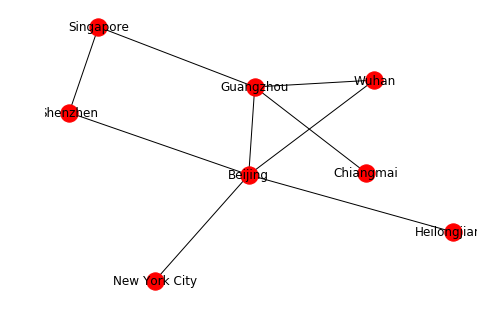

In [43]:
networkx.draw(air_route, with_labels=True)

In [53]:
def search_desitination(graph, start, destination):
    pathes = [[start]]
    seen = set()
    choosen_pathes = []
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in seen: continue
        # get new lines
        
        for city in graph[froniter]:
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination: return new_path
        
        #seen.add(city)
    return choosen_pathes

In [54]:
def draw_route(cities): return ' ✈️ -> '.join(cities)

In [56]:
draw_route(search_desitination(air_route, SG, HLG))

'Singapore ✈️ -> Guangzhou ✈️ -> Beijing ✈️ -> Heilongjiang'